In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [2]:
airplane=pd.read_excel("C:\\Users\\Vijay\\Downloads\\airlines.xlsx")
airplane.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
##Using k-means clustering method
def norm_fun(i):
    x= (i-i.mean())/i.std()
    return (x)

In [4]:
##Remove unique id column
airplane.drop(["ID#"],inplace=True,axis=1)

In [5]:
airplane.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
airplane_norm=norm_fun(airplane)

([<matplotlib.axis.XTick at 0x1b73f0ab348>,
 <a list of 18 Text xticklabel objects>)

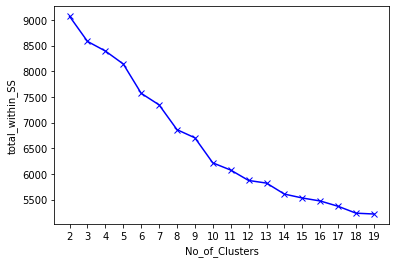

In [7]:
# Model building 
k=list(range(2,20))
TWSS=[]
for i in k:
    WSS=[]
    kmeans1 = KMeans(n_clusters = i)
    kmeans1.fit(airplane_norm)
  # variable for storing within sum of squares for each cluster 
    for j in range (i):
      WSS.append(sum(cdist(airplane_norm.iloc[kmeans1.labels_==j,:],kmeans1.cluster_centers_[j].reshape(1,airplane_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

plt.plot(k,TWSS,'bx-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [8]:
##From the scree plot, we find the the optimal value of k is 10
model1=KMeans(n_clusters=8)  
model1.fit(airplane_norm)
model1.labels_
mf1=pd.Series(model1.labels_)
airplane["Clusters"]=mf1
airplane.iloc[:,[0]]
airplane=airplane.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]
data_new=airplane.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]].groupby(airplane.Clusters).mean()  

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [35.0, 35.0, 54.375, 54.375],
  [12.5, 12.5, 44.6875, 44.6875],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [95.0, 95.0, 120.0, 120.0],
  [28.59375, 28.59375, 107.5, 107.5],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [170.0, 170.0, 210.0, 210.0],
  [145.0, 145.0, 190.0, 190.0],
  [255.0, 255.0, 265.0, 265.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [260.0, 260.0, 283.75, 283.75],
  [245.0, 245.0, 271.875, 271.875],
  [235.0, 235.0, 258.4375, 258.4375],
  [167.5, 167.5, 246.71875, 246.71875],
  [335.0, 335.0, 345.0, 345.0],
  [355.0, 355.0, 365.0, 365.

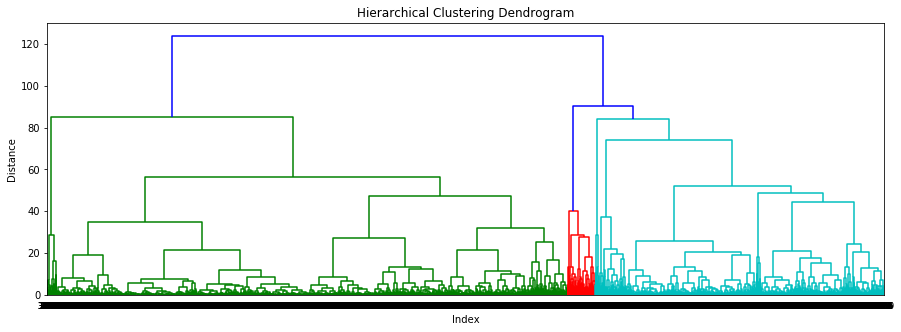

In [10]:
####Hierarchal clustering method####
airplanedata=pd.read_excel("C:\\Users\\Vijay\\Downloads\\airlines.xlsx")
def norm_fun(i):
    x= (i-i.mean())/i.std()
    return (x)
airplanedata.drop(["ID#"],inplace=True,axis=1)

aeronorm=norm_fun(airplanedata)


aeronorm.describe()
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch                       

type(aeronorm)                       
newdata = linkage(aeronorm, method="ward",metric="euclidean")                       
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')                       
sch.dendrogram(
    newdata,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)                       

In [20]:
from sklearn.cluster import AgglomerativeClustering 
h1_ward	=	AgglomerativeClustering(n_clusters=8,linkage='ward',affinity = "euclidean").fit(aeronorm) 

mydata=h1_ward.labels_ 
bc=pd.Series(mydata)                                             
airplanedata["Cluster1"]=bc  
airplane["Cluster_hier"]=bc                     
airplanedata=airplanedata.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]                       
airplanedata.groupby(airplanedata.Cluster1).mean()
airplane_new=pd.concat([bc,mf1],axis=1)##cluster numbers for the two methods of kmeans and agglomerative

In [21]:
##INFERENCES##
airplane.iloc[:,[11]]
airplane.rename(columns={'Award?':'Award'},inplace=True)
pd.crosstab(airplane.cc1_miles,airplane.Clusters)
pd.crosstab(airplane.cc2_miles,airplane.Clusters)
pd.crosstab(airplane.cc3_miles,airplane.Clusters)

Clusters,0,1,2,3,4,5,6,7
cc3_miles,,,,,,,,
1,1165,810,55,968,0,818,43,122
2,0,0,0,1,0,2,0,0
3,0,0,0,0,4,0,0,0
4,0,0,0,0,6,0,0,0
5,0,0,0,0,5,0,0,0


In [ ]:
##0th cluster has one of the lowest award but top flier miles,this cluster
##is not doing frequent bookings on EastWest Airlines as it has very low transactions
##but its enrollment date is very high which means the customers in this cluster are 
##old but not opting for this airline so propositions must be made for this cluster of
##customers to make them opt for the service.

##1st cluster contains customers who are business-class fliers but have a considerably
##lower non-flight bonus transaction than other clusters.On the other hand,they have
##a decent record of miles earned on frequent flier credit card.So,these customers 
##can be termed as fliers who do not fly that frequently as enrollment time is also 
##4th lowest but when they do,they fly via business class by making use of frequent flier 
##credit card.

##2nd cluster clearly estimates that the customers are very non-frequent economic class
##fliers with the lowest balaance, quad_mile, less non flight transactions and least
##enrollment time.

##3rd cluster can be said to have vintage and old premium business class fliers with a high balance value 
##and a high quad_miles value. Their non-flight bonus transaction is also the highest
##and they have earned decent number of miles from frequent flier credit card.

##4th cluster customers can be termed as frequent economic class fliers having high 
##number of award earning miles who make frequent usage of flyer credit card and small
##business cards as they have one of the highest non flight transactions.

##5th cluster customers are also economic class fliers with lesser pooints making frequent
##use of reward credit card. They can be deemed as frequent travellers as they have high
##rate of miles travelled and transactions made. 

##6th cluster states travellers with high award earned miles as they have high amount of
##of miles earned on reward credit cards. Also, they make frequent non flight transactions
##and have miles earned on the same.They are the oldest customers according to the enrollment
##days

##7th cluster has the highest number of business class fliers with decent award points
## making frequent use of frequent flier credit card not making much use much use of 
##non flight transactions. So, one can target this cluster to encouage using more flight 
##reward cards to earn more points